In [29]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [30]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [31]:
NUM_CLASSES = 6

# Dataset reading

In [32]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
print(len(X_dataset))

5244


In [33]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [36]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                860       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1136 (4.44 KB)
Trainable params: 1136 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [38]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [39]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 1/31 [..............................] - ETA: 11s - loss: 1.8074 - accuracy: 0.2188
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 1s 6ms/step - loss: 1.7088 - accuracy: 0.2967 - val_loss: 1.6264 - val_accuracy: 0.3333
Epoch 2/1000
 1/31 [..............................] - ETA: 0s - loss: 1.6682 - accuracy: 0.3203
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 2ms/step - loss: 1.5910 - accuracy: 0.3387 - val_loss: 1.5060 - val_accuracy: 0.3814
Epoch 3/1000
 1/31 [..............................] - ETA: 0s - loss: 1.4669 - accuracy: 0.4297
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 2ms/step - loss: 1.4774 - accuracy: 0.3893 - val_loss: 1.3916 - val_accuracy: 0.4111
Epoch 4/1000
 1/31 [..............................] - ETA: 0s - loss: 1.4157 - accuracy: 0.4297

c:\Users\ongxu\OneDrive\Documents\Coding\projects\python_projects\env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 2ms/step - loss: 1.3839 - accuracy: 0.4193 - val_loss: 1.2737 - val_accuracy: 0.4905
Epoch 5/1000
 1/31 [..............................] - ETA: 0s - loss: 1.3611 - accuracy: 0.3906
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 2ms/step - loss: 1.2826 - accuracy: 0.4577 - val_loss: 1.1531 - val_accuracy: 0.5896
Epoch 6/1000
 1/31 [..............................] - ETA: 0s - loss: 1.2363 - accuracy: 0.4922
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 2ms/step - loss: 1.2161 - accuracy: 0.4976 - val_loss: 1.0476 - val_accuracy: 0.6491
Epoch 7/1000
 1/31 [..............................] - ETA: 0s - loss: 1.1161 - accuracy: 0.5391
Epoch 7: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [=============

In [40]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 760us/step - loss: 0.2650 - accuracy: 0.9352


In [41]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [42]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 56ms/step
[5.9947977e-03 9.8431987e-01 9.1198143e-03 5.6561094e-04 7.4670542e-10
 1.5489234e-09]
1


# Confusion matrix

41/41 [==============================] - 0s 553us/step


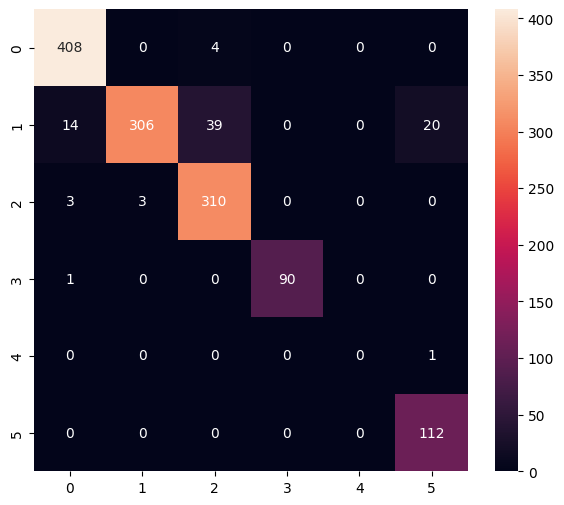

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       412
           1       0.99      0.81      0.89       379
           2       0.88      0.98      0.93       316
           3       1.00      0.99      0.99        91
           4       0.00      0.00      0.00         1
           5       0.84      1.00      0.91       112

    accuracy                           0.94      1311
   macro avg       0.78      0.79      0.78      1311
weighted avg       0.94      0.94      0.93      1311



c:\Users\ongxu\OneDrive\Documents\Coding\projects\python_projects\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ongxu\OneDrive\Documents\Coding\projects\python_projects\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ongxu\OneDrive\Documents\Coding\projects\python_projects\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [44]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\ongxu\OneDrive\Documents\Coding\projects\python_projects\env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ongxu\AppData\Local\Temp\tmpbmdv4vqc\assets


INFO:tensorflow:Assets written to: C:\Users\ongxu\AppData\Local\Temp\tmpbmdv4vqc\assets


6660

# Inference test

In [46]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [47]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [48]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [49]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 978 µs


In [50]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.9947944e-03 9.8431987e-01 9.1198096e-03 5.6561071e-04 7.4670536e-10
 1.5489233e-09]
1
